In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import correlate2d
from cv2 import imread, IMREAD_GRAYSCALE

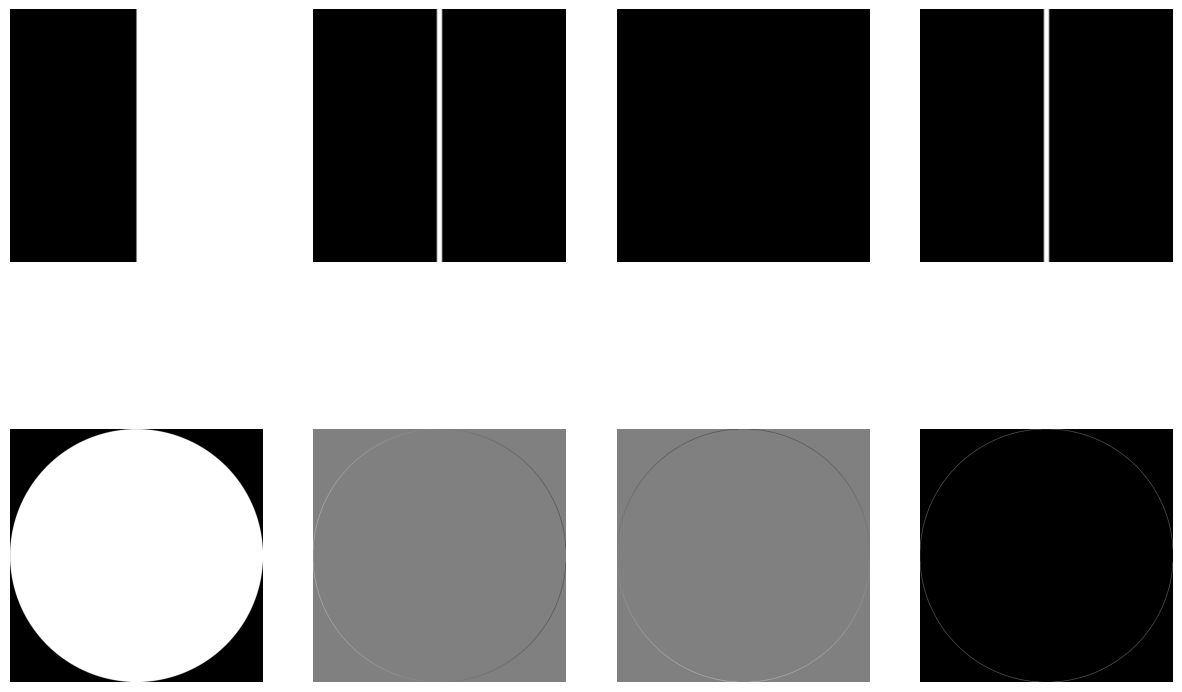

In [2]:
test1 = np.zeros((100,100),np.uint8)
test1[:,test1.shape[0]//2:] = 1
n = 2000
r = n // 2
y, x = np.ogrid[:n, :n]
test2 = ((x - r)**2 + (y - r)**2 <= r**2).astype(np.uint8)

# derivative_x = [[0,-1,1]]
# derivative_y = [[1],[-1],[0]]
# derivative_x = [[-.5,0,.5]]
# derivative_y = [[.5],[0],[-.5]]
derivative_x = [[-1,0,1],
                [-2,0,2],
                [-1,0,1]]
derivative_y = [[1,2,1],
                [0,0,0],
                [-1,-2,-1]]

edge_h1 = correlate2d(test1, derivative_x, 'valid')
edge_h2 = correlate2d(test2, derivative_x, 'valid')
edge_v1 = correlate2d(test1, derivative_y, 'valid')
edge_v2 = correlate2d(test2, derivative_y, 'valid')
edge1 = np.sqrt(edge_h1**2 + edge_v1**2)
edge2 = np.sqrt(edge_h2**2 + edge_v2**2)
# edge1 = np.abs(edge_h1) + np.abs(edge_v1)
# edge2 = np.abs(edge_h2) + np.abs(edge_v2)

_, ((ax1, ax2, ax3, ax4),
    (ax5, ax6, ax7, ax8)) = plt.subplots(2,4, figsize=(15,10))
ax1.axis('off')
ax1.imshow(test1,'gray')
ax2.axis('off')
ax2.imshow(edge_h1,'gray')
ax3.axis('off')
ax3.imshow(edge_v1,'gray')
ax4.axis('off')
ax4.imshow(edge1,'gray')
ax5.axis('off')
ax5.imshow(test2,'gray')
ax6.axis('off')
ax6.imshow(edge_h2,'gray')
ax7.axis('off')
ax7.imshow(edge_v2,'gray')
ax8.axis('off')
ax8.imshow(edge2,'gray')
plt.show()

### further optimizations:
- > convolve image and derivative of gaussian distribution to save us some extra calculations(instead of taking derivative of the convolved image)

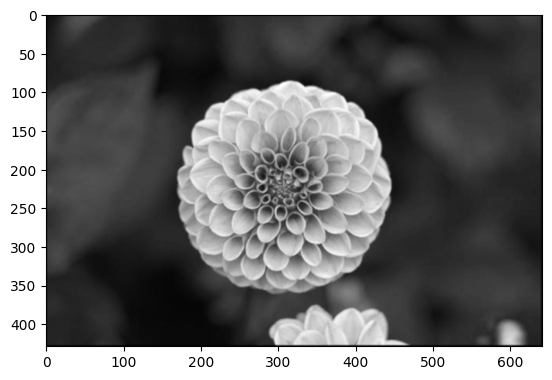

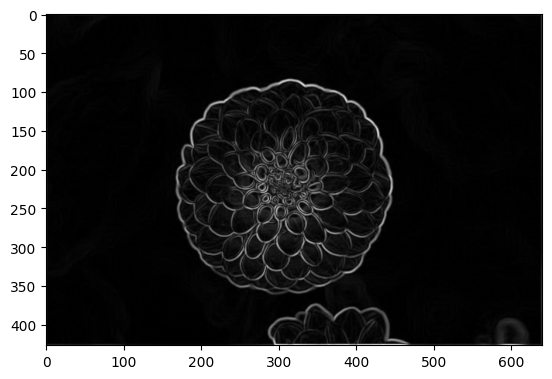

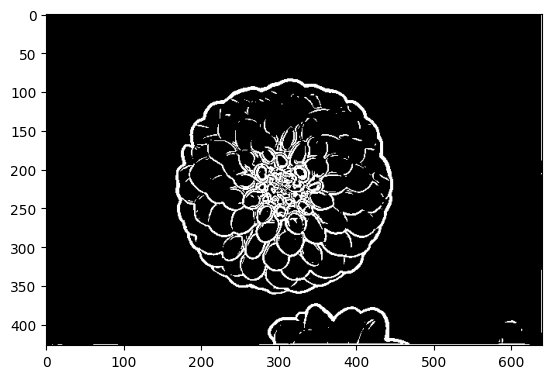

In [3]:
image = imread('flower.jpg', IMREAD_GRAYSCALE)
image = correlate2d(image, np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16)
derivative_image = np.sqrt(correlate2d(image, derivative_x, 'valid')**2 + correlate2d(image, derivative_y, 'valid')**2)
derivative_image_thresholded = (derivative_image>100).astype(np.uint8)
plt.imshow(image, 'gray')
plt.show()
plt.imshow(derivative_image, 'gray')
plt.show()
plt.imshow(derivative_image_thresholded,'gray')
plt.show()

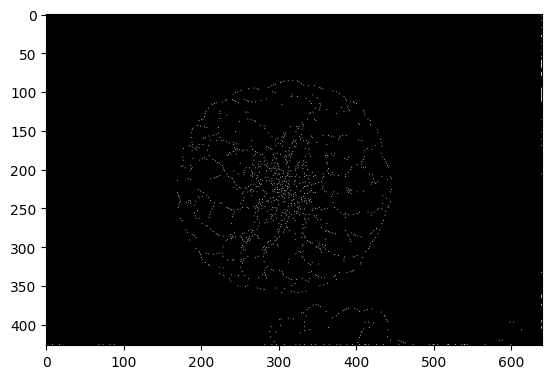

In [4]:
edge_map = np.zeros_like(derivative_image)
potential_edges = np.argwhere(derivative_image_thresholded == 1)
for (r, c) in potential_edges:
    if np.all(derivative_image[r-1:r+2,c-1:c+2] <= derivative_image[r,c]):
        edge_map[r,c] = 1

plt.imshow(edge_map,'gray')
plt.show()